<a href="https://colab.research.google.com/github/MihaelaHudisteanu/PMP-2024/blob/main/Lab12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

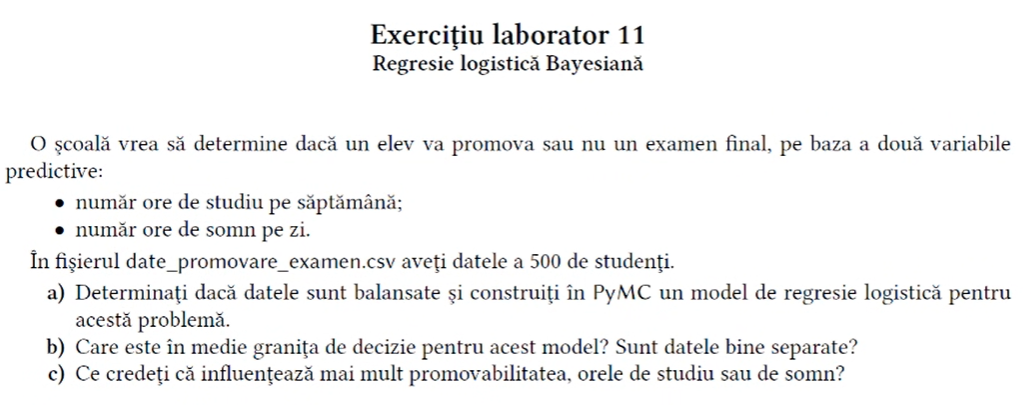

In [4]:
#a)

import pymc as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

data = pd.read_csv('date_promovare_examen.csv')

x1 = data['Ore_Studiu'].values
x2 = data['Ore_Somn'].values
y_obs = data['Promovare'].values


#Datele sunt balansate
print(f'Promovati: {sum(y_obs)}')  #250
print(f'Nepromovati: {len(y_obs) - sum(y_obs)}') #250

x1_norm = (x1 - x1.mean()) / x1.std()
x2_norm = (x2 - x2.mean()) / x2.std()

with pm.Model() as logistic_model:
    beta_0 = pm.Normal('beta_0', mu=0, sigma=10)
    beta_1 = pm.Normal('beta_1', mu=0, sigma=2)
    beta_2 = pm.Normal('beta_2', mu=0, sigma=2)

    mu = beta_0 + beta_1 * x1_norm + beta_2 * x2_norm
    theta = pm.Deterministic('theta', pm.math.sigmoid(mu))
    #theta = 1/2 = logistic(beta_0 + beta_1*x1 + beta_2*x2) <-> x2 = - beta_0/beta_2 - beta_1/beta_2*x1
    bd = pm.Deterministic('bd', - beta_0/beta_2 - beta_1/beta_2 * x1_norm)

    y = pm.Bernoulli('y', p=theta, observed=y_obs)

    idata = pm.sample(1000, return_inferencedata=True)

Promovati: 250
Nepromovati: 250


Output()

Output()

ERROR:pymc.stats.convergence:There were 15 divergences after tuning. Increase `target_accept` or reparameterize.


Text(0, 0.5, 'Ore somn')

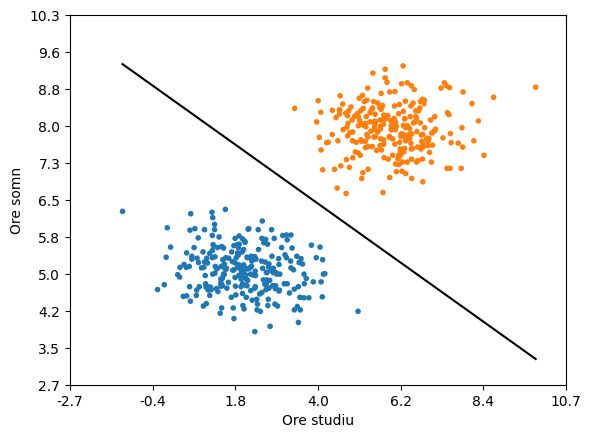

In [5]:
#b)

idx = np.argsort(x1_norm)
bd = idata.posterior['bd'].mean(("chain", "draw"))[idx]

plt.scatter(x1_norm, x2_norm, marker='.', color=[f'C{x}' for x in y_obs])

plt.plot(x1_norm[idx], bd, color='k')

locs_x, _ = plt.xticks()
plt.xticks(locs_x, np.round(locs_x * x1.std() + x1.mean(), 1))

locs_y, _ = plt.yticks()
plt.yticks(locs_y, np.round(locs_y * x2.std() + x2.mean(), 1))

plt.xlabel('Ore studiu')
plt.ylabel('Ore somn')

#Datele sunt bine separate

Media pentru beta_1 (Ore studiu): 3.697
Media pentru beta_2 (Ore somn): 5.054


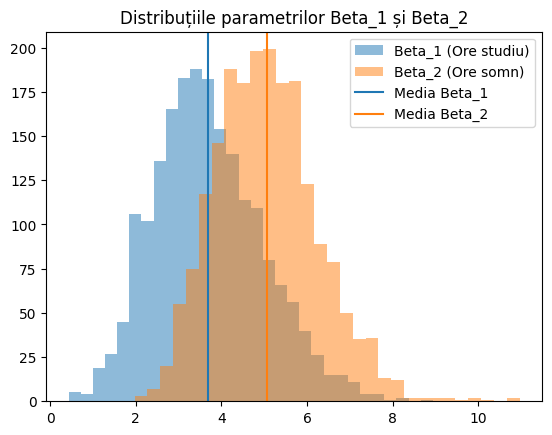

In [10]:
#c)
#pentru a vedea cine influenteaza  mai mult promovabilitatea, trebuie sa vedem cine este mai mare (in valoare absoluta), beta_1 sau beta_2

beta_1_samples = idata.posterior['beta_1'].values.flatten()
beta_2_samples = idata.posterior['beta_2'].values.flatten()

beta_1_mean = beta_1_samples.mean()
beta_2_mean = beta_2_samples.mean()

print(f"Media pentru beta_1 (Ore studiu): {beta_1_mean:.3f}")
print(f"Media pentru beta_2 (Ore somn): {beta_2_mean:.3f}")

plt.hist(beta_1_samples, bins=30, alpha=0.5, label='Beta_1 (Ore studiu)', color='C0')
plt.hist(beta_2_samples, bins=30, alpha=0.5, label='Beta_2 (Ore somn)', color='C1')
plt.axvline(beta_1_mean, color='C0',  label=f"Media Beta_1")
plt.axvline(beta_2_mean, color='C1', label=f"Media Beta_2")

plt.title("Distribuțiile parametrilor Beta_1 și Beta_2")
plt.legend()
plt.show()


#beta_1 ~ 3.697  (ore studiu)
#beta_2 ~ 5.054  (ore somn)

#Deci numarul de ore de somn influenteaza mai mult promovabilitatea